#Experiment No : 8 Discrete Fourier Transform <br>


- Name: Sachi Shah
- Batch: EC1

Aim: <br>
1.	Compute the DFT of the image and plot its Magnitude and Phase Spectrum
2.	Implement low pass and high pass filtering in frequency domain using DFT and comment on the subjective quality of the reconstructed image.


In [ ]:
import cv2
from sympy import fft, ifft
import numpy as np
import matplotlib.pyplot as plt

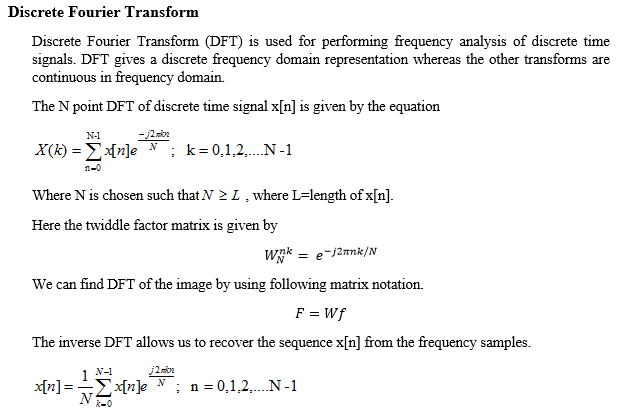

Example : 

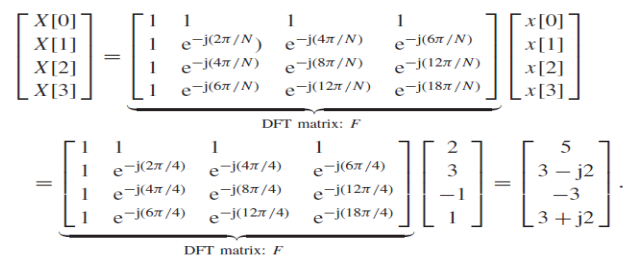

In [ ]:
"""Function to calculate the discrete Fourier Transform 
of a 1D real-valued signal x 
and Recover it"""

x = [2,3,-1,1]
print("Original Data = ",x)

X = np.fft.fft(x)
print("DFT of x(n) = ",X)

xr = np.fft.ifft(X)
print("Recovered x(n) = ",xr)


Original Data =  [2, 3, -1, 1]
DFT of x(n) =  [ 5.+0.j  3.-2.j -3.+0.j  3.+2.j]
Recovered x(n) =  [ 2.+0.j  3.+0.j -1.+0.j  1.+0.j]


compute FFT using built in function

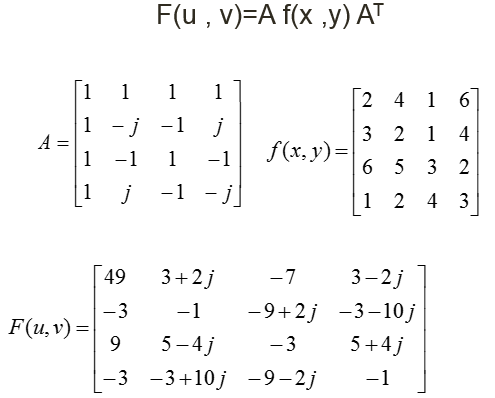

In [ ]:
x = [[2,4,1,6],[3,2,1,4],[6,5,3,2],[1,2,4,3]]
X = np.fft.fft2(x)        #fft2 means for 2D array
print("DFT of x(n) = \n",X)

print("\n")

xr = np.fft.ifft2(X)       #ifft2 means for 2D array
print("Recovered x(n) = \n",xr)

DFT of x(n) = 
 [[49. +0.j  3. +2.j -7. +0.j  3. -2.j]
 [-3. +0.j -1. +0.j -9. +2.j -3.-10.j]
 [ 9. +0.j  5. -4.j -3. +0.j  5. +4.j]
 [-3. +0.j -3.+10.j -9. -2.j -1. +0.j]]


Recovered x(n) = 
 [[2.+0.j 4.+0.j 1.+0.j 6.+0.j]
 [3.+0.j 2.+0.j 1.+0.j 4.+0.j]
 [6.+0.j 5.+0.j 3.+0.j 2.+0.j]
 [1.+0.j 2.+0.j 4.+0.j 3.+0.j]]


To center the DFT <br>
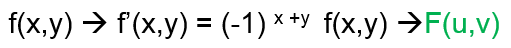

Log transform 

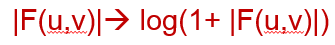

In [ ]:
#Shift the origin. Equvalent to multiplying by (-1)^x+y
x = [[2,4,1,6],[3,2,1,4],[6,5,3,2],[1,2,4,3]]
X = np.fft.fft2(x)
Xcentered = np.fft.fftshift(X)
print('Centered FFT = \n',Xcentered)

#compute the log 


Centered FFT = 
 [[-3. +0.j  5. +4.j  9. +0.j  5. -4.j]
 [-9. -2.j -1. +0.j -3. +0.j -3.+10.j]
 [-7. +0.j  3. -2.j 49. +0.j  3. +2.j]
 [-9. +2.j -3.-10.j -3. +0.j -1. +0.j]]


# To compute the DFT of a image

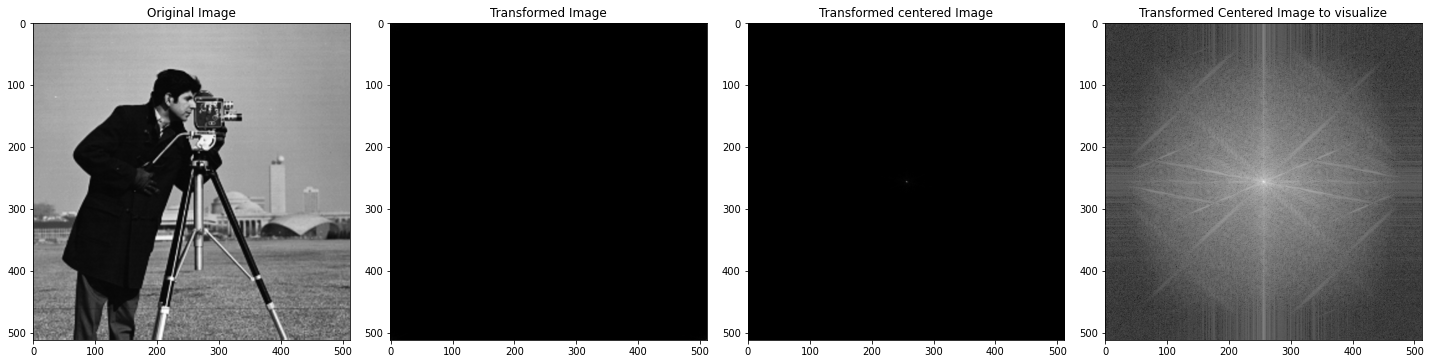

In [ ]:
# Read the image
img=cv2.imread('cameraman.tif', 0)

# Compute the FFT
imgfft=np.fft.fft2(img)

plt.figure(figsize = (20,20)) 
plt.subplot(141)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(142)
plt.imshow(np.abs(imgfft), cmap='gray')
plt.title('Transformed Image')

#centering
fftcen = np.fft.fftshift(imgfft)
plt.subplot(143)
plt.imshow(np.abs(fftcen),cmap = 'gray')
plt.title('Transformed centered Image')

#visualise(magnitude spectrum)
fftlog = np.log10(1+fftcen)
plt.subplot(144)
plt.imshow(np.abs(fftlog),cmap = 'gray')
plt.title('Transformed Centered Image to visualize')

plt.tight_layout()

In [ ]:
# Compute the Phase spectrum of the transformed image
fftphase = np.angle(imgfft)

Plot the image, magnitude spectrun, phase spectrum, log transformed magnitude spectrum

Text(0.5, 1.0, 'Phase Spectrum')

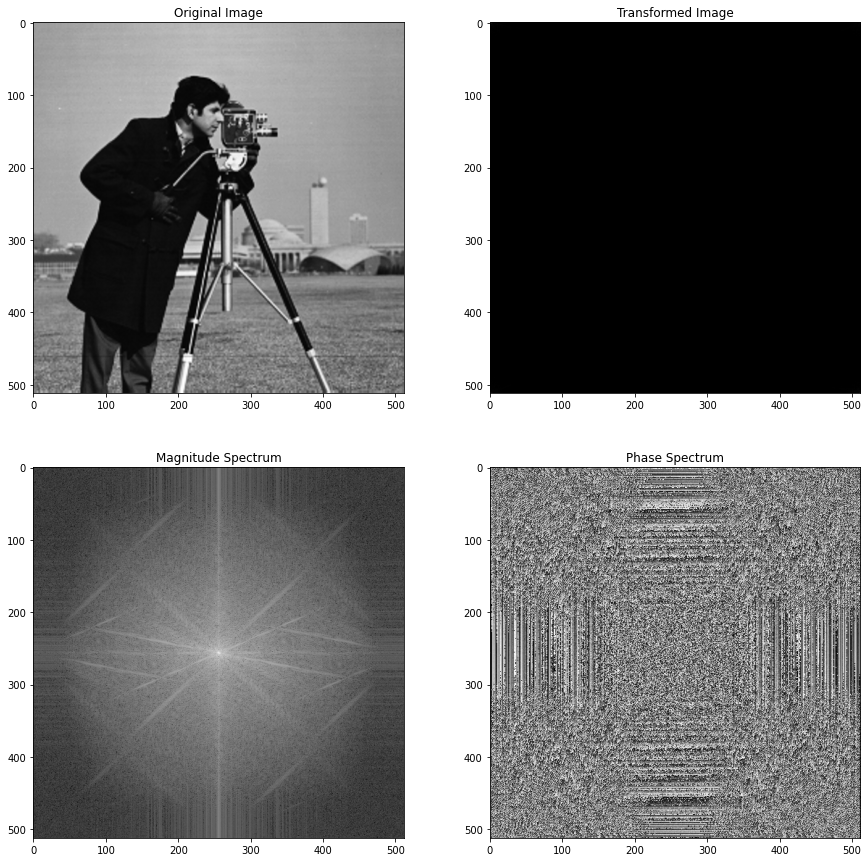

In [ ]:
plt.figure(figsize = (15,15))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(222)
plt.imshow(np.abs(imgfft), cmap='gray')
plt.title('Transformed Image')

plt.subplot(223)
plt.imshow(np.abs(fftlog),cmap = 'gray')
plt.title('Magnitude Spectrum')

plt.subplot(224)
plt.imshow(fftphase,cmap = 'gray')
plt.title('Phase Spectrum')

Filtering the low frequency and the high frequency components of an image

Develop a ideal LPF and HPF mask <br>
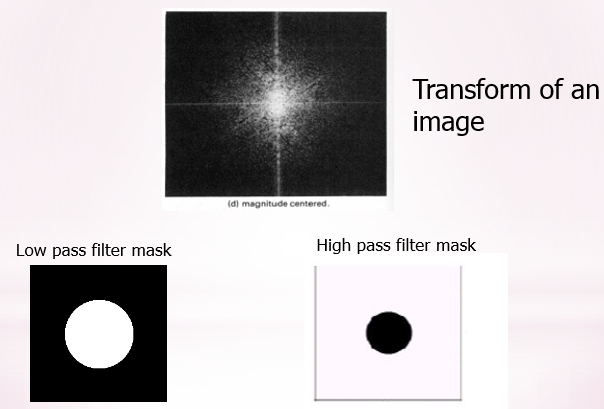

Text(0.5, 1.0, 'HPF Mask')

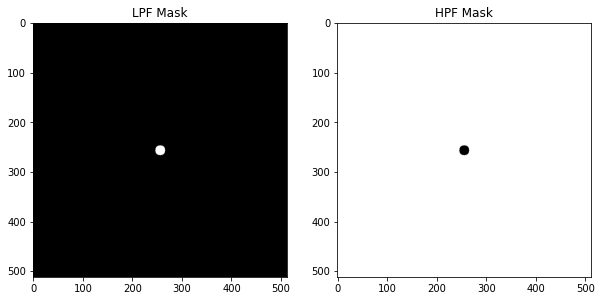

In [ ]:
# Compute the rows and columns of the image
r,c = img.shape

# copy the image as a lpf and hpf variable
lpf = img.copy()
hpf = img.copy()

#Take radii d0= 10, 30,60,160,460
d = 10 #radius of the circle

#Creat an ideal lpf and ideal hpf masks
for i in range(r):
    for j in range(c):
        d1 = np.sqrt((i-r//2)**2 + (j-c//2)**2)   #Calculated radius
        if d1>d:
            lpf[i,j] = 0
            hpf[i,j] = 1
        else:
            lpf[i,j] = 1
            hpf[i,j] = 0

#Plot orinal, low pass filtered and high pass filtered image

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(lpf,cmap = 'gray')
plt.title("LPF Mask")

plt.subplot(122)
plt.imshow(hpf,cmap = 'gray')
plt.title("HPF Mask")


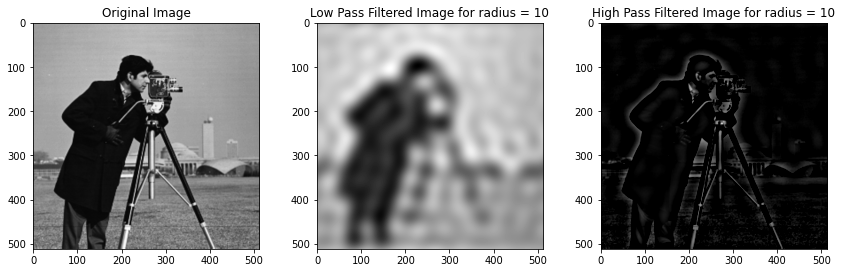

In [ ]:
# multiply lpf mask and hpf mask with the fft image
LPFimg = fftcen*lpf
HPFimg = fftcen*hpf

# shift the fft 
LPF_re_center = np.fft.fftshift(LPFimg)
HPF_re_center = np.fft.fftshift(HPFimg)

# Compute the inverse fft of the resultant filtered image
final_LPF = np.real(np.fft.ifft2(LPF_re_center))
final_HPF = np.real(np.fft.ifft2(HPF_re_center))

#Plot orinal, low pass filtered and high pass filtered image
plt.figure(figsize=(12,12))

plt.subplot(131)
plt.imshow(img,cmap = 'gray')
plt.title("Original Image")

plt.subplot(132)
plt.imshow(final_LPF,cmap = 'gray')
plt.title("Low Pass Filtered Image for radius = 10")


plt.subplot(133)
plt.imshow(final_HPF,cmap = 'gray',vmin=0,vmax=255)
plt.title("High Pass Filtered Image for radius = 10")

plt.tight_layout()

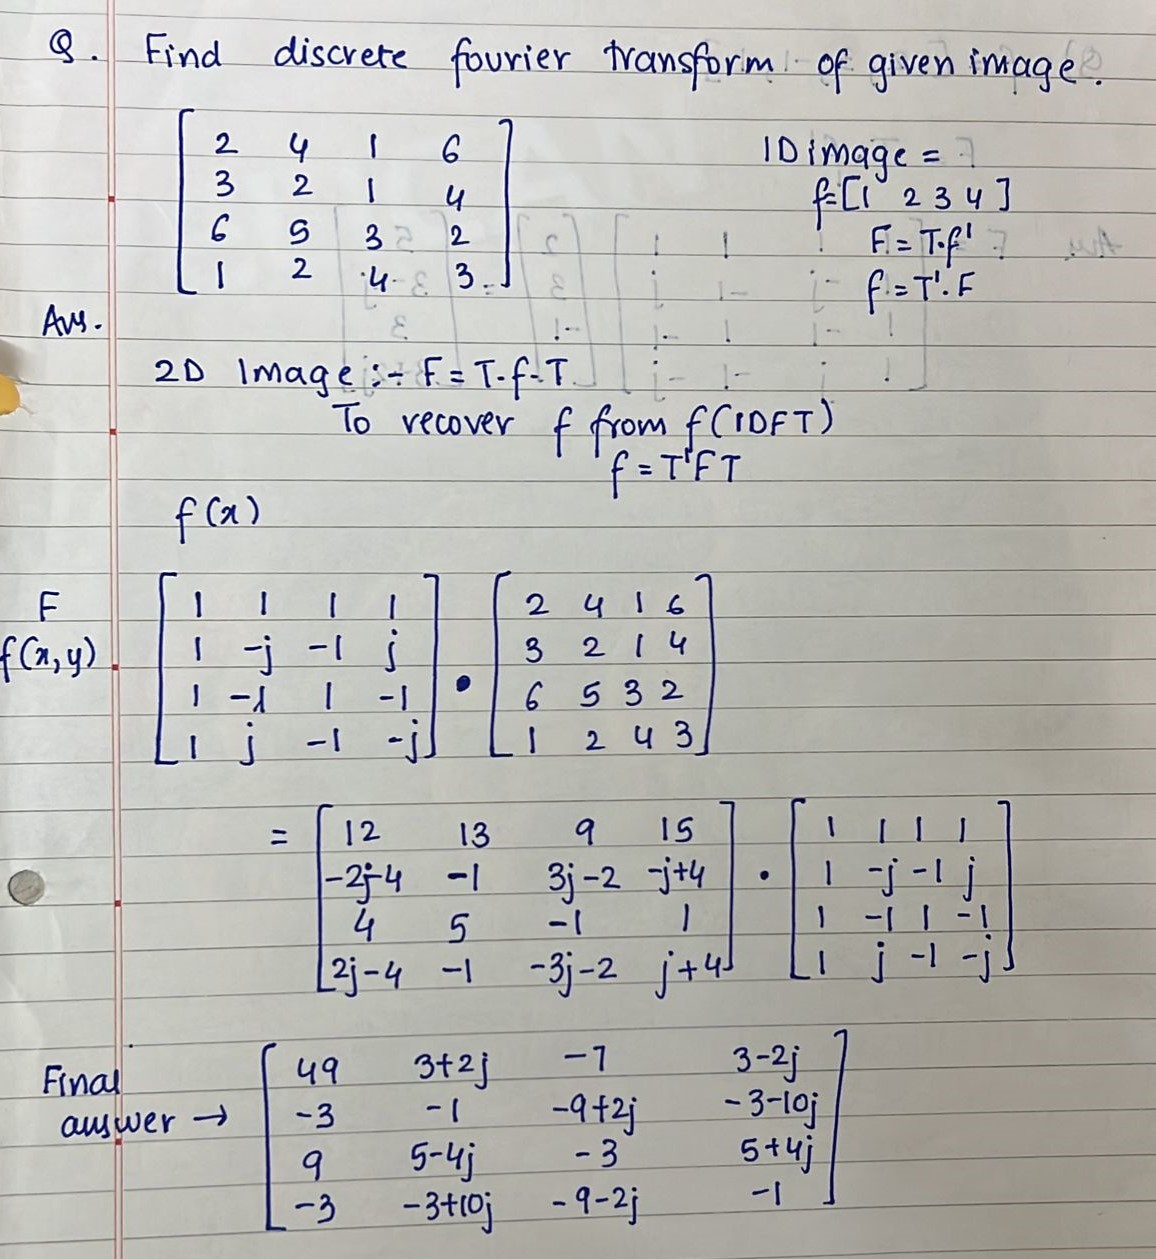

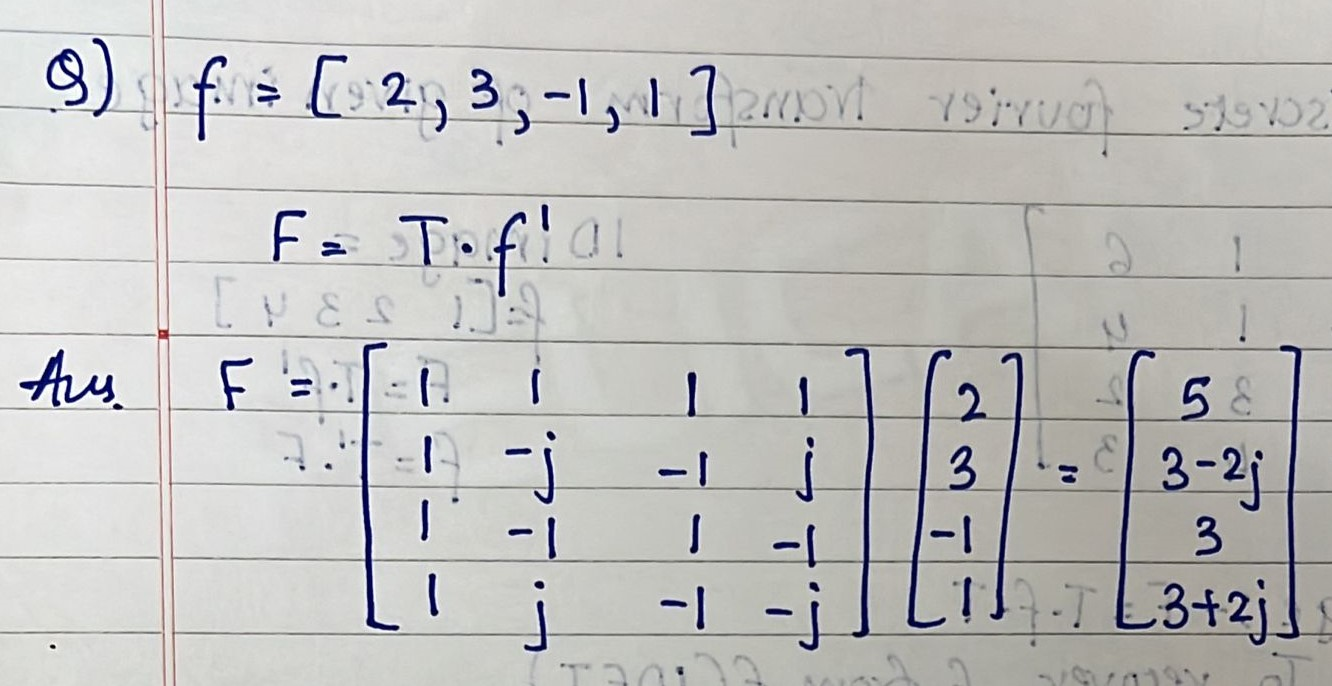

# Conclusion :
1. We computed the discrete fourrier transsform for 1D and 2D array.
2. We implemented the code for the same and verified the results   
3. We implemented the code for DFT on the image, it was obsereved that the transformed image was black in color and not visible. Therefore, we applied log transformation. Centering was done to bring low frequency pixels to center and bring high frequency pixels away from the center.
4. For filtering in frequency domain is done by multiplying transformed image and mask.
5. We implemented the lpf and hpf mask multiplied with fft. However, before computing inverse fft we have to recenter the centered transformed image. We then obsereved the output of low pass and high pass filtered images. LPF provides blurring and HPF provides sharpening of the image.